## A PROPOSAL FOR FORD GO BIKE COMPANY

Ford Go company is running Bay Area Bikeshare. 

Business Problem: 
The company would like to increase the ridership and using analysis and insights from the data the company has available, what deals can we offer to our customers/subscribers through the mobile app.


Current Business Model:


1) A flat price for a single one-way trip

2) A day pass that allows unlimited 30-minute rides for 24 hours

3) Annual membership


---

# ANALYSIS AND ACTIONABLE INSIGHTS

Bay Area BikeShare has two types of rides - 1) subscribers and 2) customers



Overall, in our dataset, we have more subscribers than customers. However, over the last few years, between the years 2015 and 2016, the number of subscribers and members have gone down but the subscribers have decreased at a higher rate than the members.



We wanted to look deeper, and analyze the behaviors beyond just the numbers. Although the number of trips for subscribers is higher than the customers, but very interestingly, the customers have a longer duration of their trips (minutes). We can leverage this number as an opportunity, because now we know that these customers are here with us on a shorter term. They are not repeat customers and they do not take many trips, but the trips they do end up taking are longer in duration. The question is how can we use this offset between the number of trips and the duration of trips to convert these short term customers into longer term members. 


We further broke down the data by time of the day and week of the day, and interestingly again the customers showed more activity on the weekends during afternoon and evening times.


According to a recent study done to study the memberships models of different companies, one key insight was that in terms of marketing dollars, it is 7 times more expensive to acquire new customers than to retain the customers. Therefore, our business strategy should focus on how to retain our existing audience and convert them to life-time members/subscribers. 

---

# RECOMMENDATIONS

SUBSCRIBERS

Our subscribers in numbers are decreasing and hence we are in need to change our business model or a product recommendation so that they are more incentivized

Reommendation for subscribers:  Package for commuters 

To lure in the early morning and evening time commuters, the Ford Go Data Science team suggests to introduce a package for the commuters. Since their number of trips during weekdays is high but the duration is low, we can introduce "bundle pricing model for weekday" which allows these subscribers to buy packages in advance at a specific price.

CUSTOMERS

Our customers are not as many as subscribers, or they may not be taking as many rides as our subscribers in volume but the duration of their trips in higher. Therefore our pricing model should incentivize their duration of teh trips especially on the weekends where their activity is the highest. To convert these customers into loyal members/subscribers -- introduce an unlimited minutes for the weekend at a specific price which gives them an annual membership as well for no charge. Since most of these customers come on weekends, it may be safe to assume they are tourists who are not local to SF. This way at an added value/price to the company, we can sell them more minutes and successfully convert them to members at the same time.

---

# ADDITIONAL QUESTIONS THAT CAN REFINE THE ANALYSIS

How many existing customers/subscribers do we have under each of the pricing model?

What are the business models / pricing strategies of our competitors?

Do we have data on member id? It will be interesting to see how many are new/acquired subscribers/customers vs returning subscribers/customers?

Currently, what is our revenue and the Cost of Acquisition per member

---

# SQL QUERIES

In [5]:
#QUERY 1 -- HOW MANY SUBSCRIBERS VS CUSTOMERS DOES FORD GO COMPANY HAVE?

!bq query --use_legacy_sql=FALSE --format=csv 'SELECT count(subscriber_type) Total_per_subscriber, subscriber_type FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY subscriber_type' > result_sub_customers.csv

Waiting on bqjob_r7f33e0ed5092ba33_0000016b3409a4ac_1 ... (0s) Current status: DONE   

In [6]:
#QUERY 2 -- FORD GO COMPANY HAS MORE SUBSCRIBERS THAN CUSTOMERS. THIS IS GREAT!
#CHECK HOW THE NUMBERS OF SUBSCRIBERS AND CUSTOMERS HAVE CHANGED OVER THE YEARS


!bq query --use_legacy_sql=FALSE --format=csv  'SELECT  extract(year from start_date) as Year,  count(subscriber_type) Total_per_subscriber, subscriber_type FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY Year, subscriber_type Order by Year, subscriber_type' > result.csv

Waiting on bqjob_r1c2307125bb330d9_0000016b3409b246_1 ... (0s) Current status: DONE   

In [7]:
#QUERY 3 -- MAPPING THE CUSTOMERS AND SUBSCRIBERS COMMITMENT TO BIKE SHARING THAN JUST RAW NUMBERS IS IMPORTANT
#CHECK HOW THE NUMBER OF TRIPS TAKEN AND THE MINUTES OF TRIPS VARY BY CUSTOMER VS SUBSCRIBER

!bq query --use_legacy_sql=FALSE --format=csv  'SELECT extract(year from start_date) as Year, count(trip_id) as Number_of_trips, subscriber_type FROM `bigquery-public-data.san_francisco.bikeshare_trips` group by Year, subscriber_type Order by Year, subscriber_type' > result1.csv

!bq query --use_legacy_sql=FALSE --format=csv  'SELECT extract(year from start_date) as Year, subscriber_type, sum(timestamp_diff(end_date, start_date, minute)) as Minutes FROM `bigquery-public-data.san_francisco.bikeshare_trips` group by Year, subscriber_type order by Year, subscriber_type, Minutes' > result2.csv

Waiting on bqjob_r77c4596d614f458a_0000016b3409c1ec_1 ... (0s) Current status: DONE   

In [8]:
#QUERY 4 -- SPLITTING THE USAGE OF THE BIKE SHARE BY DAY OF THE WEEK FOR SUBSCRIBERS VS CUSTOMERS
#USING EXTRACT FUNCTION ON SQL WHICH MAPS 1 AS SUNDAY AND SO ON

!bq query --use_legacy_sql=FALSE --format=csv  'SELECT CASE WHEN extract(DAYOFWEEK from start_date)=1 THEN "Sunday" WHEN extract(DAYOFWEEK from start_date)=2 THEN "Monday" WHEN extract(DAYOFWEEK from start_date)=3 THEN "Tuesday" WHEN extract(DAYOFWEEK from start_date)=4 THEN "Wednesday" WHEN extract(DAYOFWEEK from start_date)=5 THEN "Thursday" WHEN extract(DAYOFWEEK from start_date)=6 THEN "Friday" WHEN extract(DAYOFWEEK from start_date)=7 THEN "Saturday" END as Day_of_the_week, subscriber_type, count(trip_id) as trip, sum(timestamp_diff(end_date, start_date, minute)) as Minutes FROM `bigquery-public-data.san_francisco.bikeshare_trips` group by Day_of_the_week, subscriber_type order by Day_of_the_week, subscriber_type' > result3.csv

Waiting on bqjob_r35b218441426deea_0000016b3409d2fb_1 ... (0s) Current status: DONE   

In [9]:
#QUERY 5 -- SPLITTING THE USAGE OF THE BIKE SHARE BY DAY OF THE WEEK AND TIME OF THE DAY FOR SUBSCRIBERS VS CUSTOMERS
#USING EXTRACT FUNCTION ON SQL WHICH MAPS 0 AS 12 AM AND SO ON
#CLASSIFIED THE TIME OF THE DAY INTO 1) EARLY MORNING 2) AFTERNOON 3) EVENING 4) NIGHT 5)LATE NIGHT

!bq query --use_legacy_sql=FALSE --format=csv  'SELECT CASE WHEN extract(DAYOFWEEK from start_date)=1 THEN "Sunday" WHEN extract(DAYOFWEEK from start_date)=2 THEN "Monday" WHEN extract(DAYOFWEEK from start_date)=3 THEN "Tuesday" WHEN extract(DAYOFWEEK from start_date)=4 THEN "Wednesday" WHEN extract(DAYOFWEEK from start_date)=5 THEN "Thusday" WHEN extract(DAYOFWEEK from start_date)=6 THEN "Friday" WHEN extract(DAYOFWEEK from start_date)=7 THEN "Saturday" END as Day_of_the_week, subscriber_type, CASE WHEN extract(HOUR from start_date) >= 0 and extract(HOUR from start_date) < 6 THEN "Late Night" WHEN extract(HOUR from start_date) >= 6 and extract(HOUR from start_date) < 11 THEN "Early Morning" WHEN extract(HOUR from start_date) >= 11 and extract(HOUR from start_date) < 15 THEN "Afternoon" WHEN extract(HOUR from start_date) >= 15 and extract(HOUR from start_date) < 20 THEN "Evening" WHEN extract(HOUR from start_date) >= 20 and  extract(HOUR from start_date) <= 23 THEN "Night" END as Time_of_day, count(trip_id) as trip, sum(timestamp_diff(end_date, start_date, minute)) as Minutes FROM `bigquery-public-data.san_francisco.bikeshare_trips` group by Day_of_the_week, Time_of_day, subscriber_type order by Day_of_the_week, Time_of_day, subscriber_type' > result_final.csv

Waiting on bqjob_r59297358db96894b_0000016b3409de61_1 ... (0s) Current status: DONE   

---

# PYTHON

## PIVOT TABLES AND DATA FRAMES

In [10]:
#IMPORT THE PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data_sub_customers = pd.read_csv('result_sub_customers.csv')
data_sub_customers

,Total_per_subscriber,subscriber_type
0,136809,Customer
1,846839,Subscriber


In [12]:
data = pd.read_csv('result.csv')
data

,Year,Total_per_subscriber,subscriber_type
0,2013,24499,Customer
1,2013,76064,Subscriber
2,2014,48576,Customer
3,2014,277763,Subscriber
4,2015,40530,Customer
5,2015,305722,Subscriber
6,2016,23204,Customer
7,2016,187290,Subscriber


In [13]:
data1 = pd.read_csv('result1.csv')
data1

,Year,Number_of_trips,subscriber_type
0,2013,24499,Customer
1,2013,76064,Subscriber
2,2014,48576,Customer
3,2014,277763,Subscriber
4,2015,40530,Customer
5,2015,305722,Subscriber
6,2016,23204,Customer
7,2016,187290,Subscriber


In [14]:
data2 = pd.read_csv('result2.csv')
data2

,Year,subscriber_type,Minutes
0,2013,Customer,1445698
1,2013,Subscriber,763387
2,2014,Customer,3431746
3,2014,Subscriber,2725385
4,2015,Customer,2449913
5,2015,Subscriber,2980766
6,2016,Customer,1151626
7,2016,Subscriber,1756835


In [15]:
data3 = pd.read_csv('result3.csv')
data3

,Day_of_the_week,subscriber_type,trip,Minutes
0,Friday,Customer,19929,1205513
1,Friday,Subscriber,140048,1394510
2,Monday,Customer,15142,820564
3,Monday,Subscriber,154795,1478570
4,Saturday,Customer,29244,2228825
5,Saturday,Subscriber,31035,363815
6,Sunday,Customer,25908,1774666
7,Sunday,Subscriber,25467,288400
8,Thursday,Customer,16612,895115
9,Thursday,Subscriber,160296,1519059


In [16]:
data_final = pd.read_csv('result_final.csv')
data_final

,Day_of_the_week,subscriber_type,Time_of_day,trip,Minutes
0,Friday,Customer,Afternoon,6997,461255
1,Friday,Subscriber,Afternoon,20918,204080
2,Friday,Customer,Early Morning,3443,238153
3,Friday,Subscriber,Early Morning,57205,534665
4,Friday,Customer,Evening,7384,368938
5,Friday,Subscriber,Evening,54424,570432
6,Friday,Customer,Late Night,277,30067
7,Friday,Subscriber,Late Night,1620,15621
8,Friday,Customer,Night,1828,107100
9,Friday,Subscriber,Night,5881,69712


---

# VISUALIZATIONS AND PIVOT TABLES

In [17]:
#PIVOT TABLE TO ANALYZE THE GROWTH OF SUBSCRIBER AND CUSTOMER OVER THE YEARS

pivoted1 = pd.pivot_table(data1, values='Number_of_trips', columns='subscriber_type', index='Year')
pivoted1

subscriber_type,Customer,Subscriber
Year,,
2013,24499,76064
2014,48576,277763
2015,40530,305722
2016,23204,187290


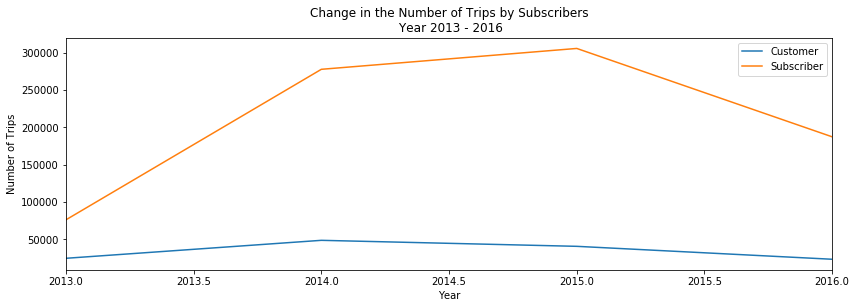

In [18]:
#VISUALIZATION TO VISUALIZE THE CHANGE IN THE NUMBER OF TRIPS TAKEN BY SUBSCRIBERS VS CUSTOMERS

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(1,1,1) 
pivoted1.plot.line(stacked=False, ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.tight_layout()
ax.set_facecolor('xkcd:white')
plt.legend(loc = "best")
plt.title("Change in the Number of Trips by Subscribers\n Year 2013 - 2016")
plt.show()

In [20]:
#PIVOT TABLE TO ANALYZE THE DURATION OF TRIPS FOR SUBSCRIBER AND CUSTOMER OVER THE YEARS

pivoted2 = pd.pivot_table(data2, values='Minutes', columns='subscriber_type', index='Year')
pivoted2

subscriber_type,Customer,Subscriber
Year,,
2013,1445698,763387
2014,3431746,2725385
2015,2449913,2980766
2016,1151626,1756835


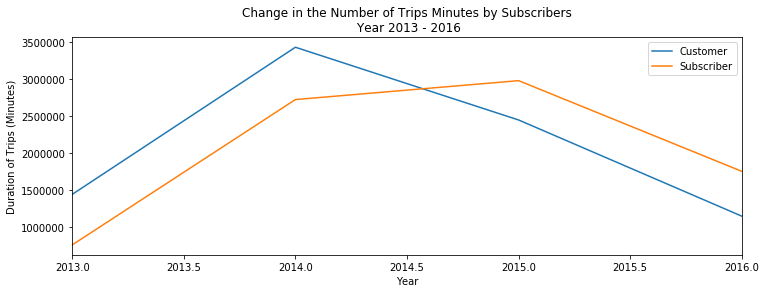

In [21]:
#VISUALIZATION TO VISUALIZE THE CHANGE IN THE DURATION OF TRIPS TAKEN BY SUBSCRIBERS VS CUSTOMERS

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(1,1,1) 
pivoted2.plot.line(stacked=False, ax=ax)
plt.xlabel('Year')
plt.ylabel('Duration of Trips (Minutes)')
plt.xticks(rotation=0)
plt.legend(loc = "best")
plt.title("Change in the Number of Trips Minutes by Subscribers\n Year 2013 - 2016")
plt.show()

In [22]:
#PIVOT TABLE TO ANALYZE THE DURATION OF TRIPS FOR SUBSCRIBER AND CUSTOMER OVER DIFFERENT DAYS OF THE WEEK

pivoted3 = pd.pivot_table(data3, values='Minutes', columns='subscriber_type', index='Day_of_the_week')
pivoted3 = pivoted3.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

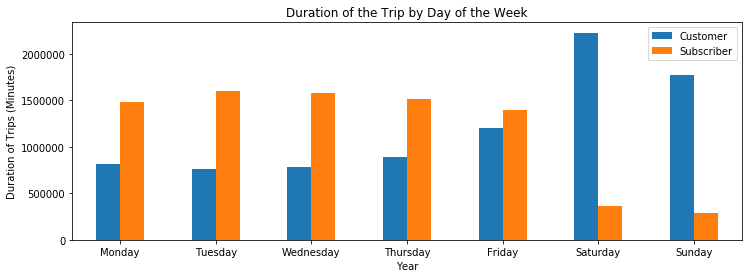

In [28]:
#VISUALIZATION TO VISUALIZE THE DURATION OF TRIPS FOR SUBSCRIBER AND CUSTOMER OVER DIFFERENT DAYS OF THE WEEK


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(1,1,1) 
pivoted3.plot.bar(stacked=False, ax=ax)
plt.xlabel('Year')
plt.ylabel('Duration of Trips (Minutes)')
plt.xticks(rotation=0)
plt.legend(loc = "best")
plt.title("Duration of the Trip by Day of the Week")
plt.show()

In [23]:
#PIVOT TABLE TO ANALYZE THE NUMBER OF TRIPS FOR SUBSCRIBER AND CUSTOMER OVER DIFFERENT DAYS OF THE WEEK

pivoted4 = pd.pivot_table(data3, values='trip', columns='subscriber_type', index='Day_of_the_week')
pivoted4 = pivoted4.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

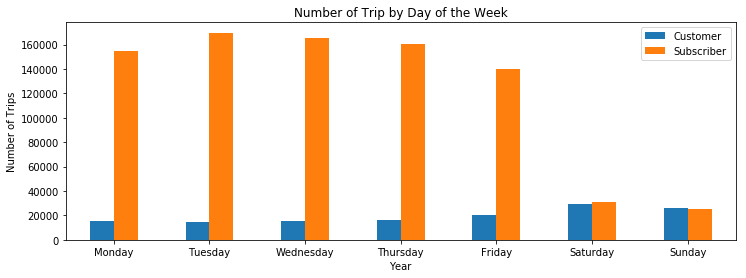

In [29]:
#VISUALIZATION TO VISUALIZE THE NUMBER OF TRIPS FOR SUBSCRIBER AND CUSTOMER OVER DIFFERENT DAYS OF THE WEEK

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(1,1,1) 
pivoted4.plot.bar(stacked=False, ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.legend(loc = "best")
plt.title("Number of Trip by Day of the Week")
plt.show()

In [24]:
#PIVOT TABLE TO ANALYZE THE NUMBER OF TRIPS FOR CUSTOMER OVER DIFFERENT DAYS OF THE WEEK AT DIFFERENT TIMES OF THE DAY

data_final_customer = data_final[data_final['subscriber_type']== "Customer"]
pivoted_final_customer = data_final_customer.groupby(['Day_of_the_week','Time_of_day'])['trip'].sum().unstack('Time_of_day').fillna(0)
pivoted_final_customer = pd.DataFrame(data = pivoted_final_customer)
pivoted_final_customer = pivoted_final_customer.reindex(["Monday", "Tuesday", "Wednesday", "Thusday", "Friday", "Saturday", "Sunday"])
pivoted_final_customer

Time_of_day,Afternoon,Early Morning,Evening,Late Night,Night
Day_of_the_week,,,,,
Monday,5119,2835,5677,320,1191
Tuesday,4503,3020,5762,178,1274
Wednesday,4508,3156,5939,294,1340
Thusday,5341,3208,6416,269,1378
Friday,6997,3443,7384,277,1828
Saturday,12063,3987,10610,569,2015
Sunday,10511,3996,9436,664,1301


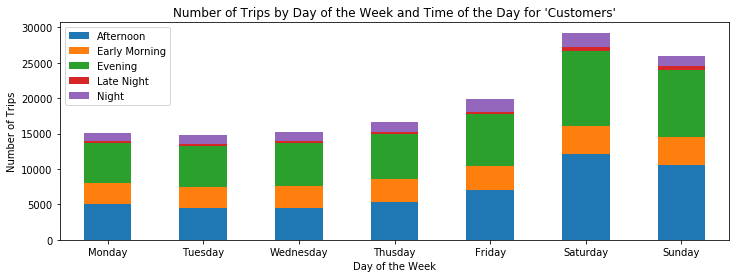

In [148]:
#VISUALIZATION TO VISUALIZE THE NUMBER OF TRIPS FOR CUSTOMER OVER DIFFERENT DAYS OF THE WEEK AT DIFFERENT TIMES OF THE DAY

fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(1,1,1) 
pivoted_final_customer.plot.bar(stacked=True, ax=ax)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.legend(loc = "best")
plt.title("Number of Trips by Day of the Week and Time of the Day for 'Customers'")
plt.show()

In [25]:
#PIVOT TABLE TO ANALYZE THE NUMBER OF TRIPS FOR SUBSCRIBER OVER DIFFERENT DAYS OF THE WEEK AT DIFFERENT TIMES OF THE DAY

data_final_subscriber = data_final[data_final['subscriber_type']== "Subscriber"]
pivoted_final_subscriber = data_final_subscriber.groupby(['Day_of_the_week','Time_of_day'])['trip'].sum().unstack('Time_of_day').fillna(0)
pivoted_final_subscriber = pd.DataFrame(data = pivoted_final_subscriber)
pivoted_final_subscriber = pivoted_final_subscriber.reindex(["Monday", "Tuesday", "Wednesday", "Thusday", "Friday", "Saturday", "Sunday"])
pivoted_final_subscriber

Time_of_day,Afternoon,Early Morning,Evening,Late Night,Night
Day_of_the_week,,,,,
Monday,17570,63755,65123,1327,7020
Tuesday,20599,69932,69043,1690,8404
Wednesday,20497,67883,66587,1750,8813
Thusday,21661,65444,63173,1687,8331
Friday,20918,57205,54424,1620,5881
Saturday,10088,6690,9949,999,3309
Sunday,8548,4860,8800,874,2385


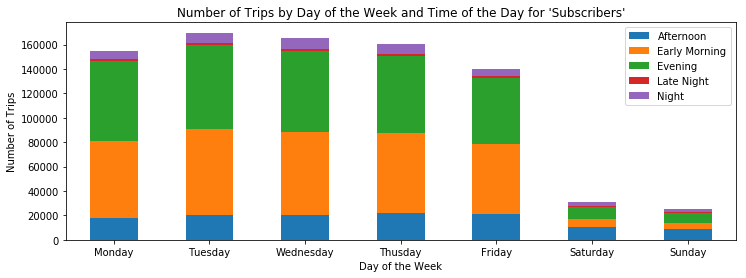

In [30]:
#VISUALIZATION TO VISUALIZE THE NUMBER OF TRIPS FOR SUBSCRIBER OVER DIFFERENT DAYS OF THE WEEK AT DIFFERENT TIMES OF THE DAY


fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(1,1,1) 
pivoted_final_subscriber.plot.bar(stacked=True, ax=ax)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.legend(loc = "best")
plt.title("Number of Trips by Day of the Week and Time of the Day for 'Subscribers'")
plt.show()

In [26]:
#PIVOT TABLE TO ANALYZE THE DURATION OF TRIPS FOR CUSTOMER OVER DIFFERENT DAYS OF THE WEEK AT DIFFERENT TIMES OF THE DAY

data_final_customer_mins = data_final[data_final['subscriber_type']== "Customer"]
pivoted_final_customer_mins = data_final_customer_mins.groupby(['Day_of_the_week','Time_of_day'])['Minutes'].sum().unstack('Time_of_day').fillna(0)
pivoted_final_customer_mins = pd.DataFrame(data = pivoted_final_customer_mins)
pivoted_final_customer_mins = pivoted_final_customer_mins.reindex(["Monday", "Tuesday", "Wednesday", "Thusday", "Friday", "Saturday", "Sunday"])
pivoted_final_customer_mins

Time_of_day,Afternoon,Early Morning,Evening,Late Night,Night
Day_of_the_week,,,,,
Monday,312397,173939,247475,24233,62520
Tuesday,281785,154581,255010,19687,55165
Wednesday,270148,185732,241974,30422,59796
Thusday,309522,192910,271894,33840,86949
Friday,461255,238153,368938,30067,107100
Saturday,884749,318534,570121,63433,391988
Sunday,753427,316107,477537,130017,97578


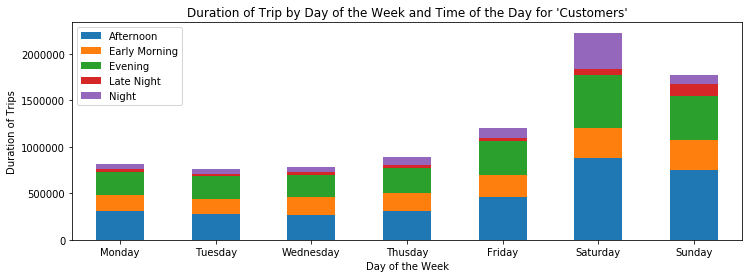

In [166]:
#VISUALIZATION TO VISUALIZE THE DURATION OF TRIPS FOR CUSTOMER OVER DIFFERENT DAYS OF THE WEEK AT DIFFERENT TIMES OF THE DAY


fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(1,1,1) 
pivoted_final_customer_mins.plot.bar(stacked=True, ax=ax)
plt.xlabel('Day of the Week')
plt.ylabel('Duration of Trips')
plt.xticks(rotation=0)
plt.legend(loc = "best")
plt.title("Duration of Trip by Day of the Week and Time of the Day for 'Customers'")
plt.show()

In [27]:
#PIVOT TABLE TO ANALYZE THE DURATION OF TRIPS FOR SUBSCRIBER OVER DIFFERENT DAYS OF THE WEEK AT DIFFERENT TIMES OF THE DAY

data_final_sub_mins = data_final[data_final['subscriber_type']== "Subscriber"]
pivoted_final_subs_mins = data_final_sub_mins.groupby(['Day_of_the_week','Time_of_day'])['Minutes'].sum().unstack('Time_of_day').fillna(0)
pivoted_final_sub_mins = pd.DataFrame(data = pivoted_final_customer)
pivoted_final_sub_mins = pivoted_final_sub_mins.reindex(["Monday", "Tuesday", "Wednesday", "Thusday", "Friday", "Saturday", "Sunday"])
pivoted_final_sub_mins

Time_of_day,Afternoon,Early Morning,Evening,Late Night,Night
Day_of_the_week,,,,,
Monday,5119,2835,5677,320,1191
Tuesday,4503,3020,5762,178,1274
Wednesday,4508,3156,5939,294,1340
Thusday,5341,3208,6416,269,1378
Friday,6997,3443,7384,277,1828
Saturday,12063,3987,10610,569,2015
Sunday,10511,3996,9436,664,1301


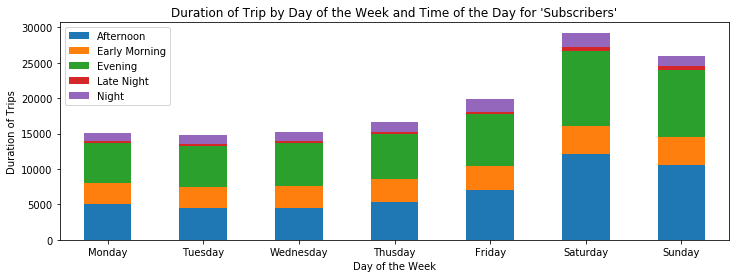

In [31]:
#VISUALIZATION TO VISUALIZE THE DURATION OF TRIPS FOR SUBSCRIBER OVER DIFFERENT DAYS OF THE WEEK AT DIFFERENT TIMES OF THE DAY


fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(1,1,1) 
pivoted_final_sub_mins.plot.bar(stacked=True, ax=ax)
plt.xlabel('Day of the Week')
plt.ylabel('Duration of Trips')
plt.xticks(rotation=0)
plt.legend(loc = "best")
plt.title("Duration of Trip by Day of the Week and Time of the Day for 'Subscribers'")
plt.show()